<a href="https://colab.research.google.com/github/proyectonst/quant-101/blob/main/quant_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
# loading the class data from the package pandas_datareader
from pandas_datareader import data
# First day
start_date = '2017-01-01'
# Last day
end_date = '2021-05-03'
# Call the function DataReader from the class data
goog_data = data.DataReader('ES=F', 'yahoo', start_date, end_date)
print(goog_data)

               High      Low     Open    Close     Volume  Adj Close
Date                                                                
2017-01-03  2259.50  2239.50  2240.75  2252.50  1810351.0    2252.50
2017-01-04  2267.25  2251.00  2252.75  2264.25  1404875.0    2264.25
2017-01-05  2266.00  2254.00  2264.50  2264.25  1324035.0    2264.25
2017-01-06  2277.00  2258.25  2264.25  2271.50  1551007.0    2271.50
2017-01-09  2275.25  2263.50  2271.25  2265.00  1025182.0    2265.00
...             ...      ...      ...      ...        ...        ...
2021-04-27  4192.50  4166.75  4181.50  4179.00   992029.0    4179.00
2021-04-28  4193.75  4172.75  4180.25  4176.25  1282972.0    4176.25
2021-04-29  4211.00  4168.00  4184.75  4203.50  1746965.0    4203.50
2021-04-30  4201.50  4167.25  4200.75  4174.50  1746965.0    4174.50
2021-05-03  4202.50  4181.50  4181.50  4199.25   395755.0    4199.25

[1080 rows x 6 columns]


In [64]:
goog_data_signal = pd.DataFrame(index=goog_data.index)
goog_data_signal['price'] = goog_data['Adj Close']
goog_data_signal['daily_difference'] = goog_data_signal['price'].diff()
print(goog_data_signal.head())

              price  daily_difference
Date                                 
2017-01-03  2252.50               NaN
2017-01-04  2264.25             11.75
2017-01-05  2264.25              0.00
2017-01-06  2271.50              7.25
2017-01-09  2265.00             -6.50


In [65]:
import numpy as np
goog_data_signal['signal'] = 0.0
goog_data_signal['signal'] = np.where(goog_data_signal['daily_difference'] > -1.0, 1.0, 0.0)
goog_data_signal['positions'] = goog_data_signal['signal'].diff()
print(goog_data_signal.head())

              price  daily_difference  signal  positions
Date                                                    
2017-01-03  2252.50               NaN     0.0        NaN
2017-01-04  2264.25             11.75     1.0        1.0
2017-01-05  2264.25              0.00     1.0        0.0
2017-01-06  2271.50              7.25     1.0        0.0
2017-01-09  2265.00             -6.50     0.0       -1.0


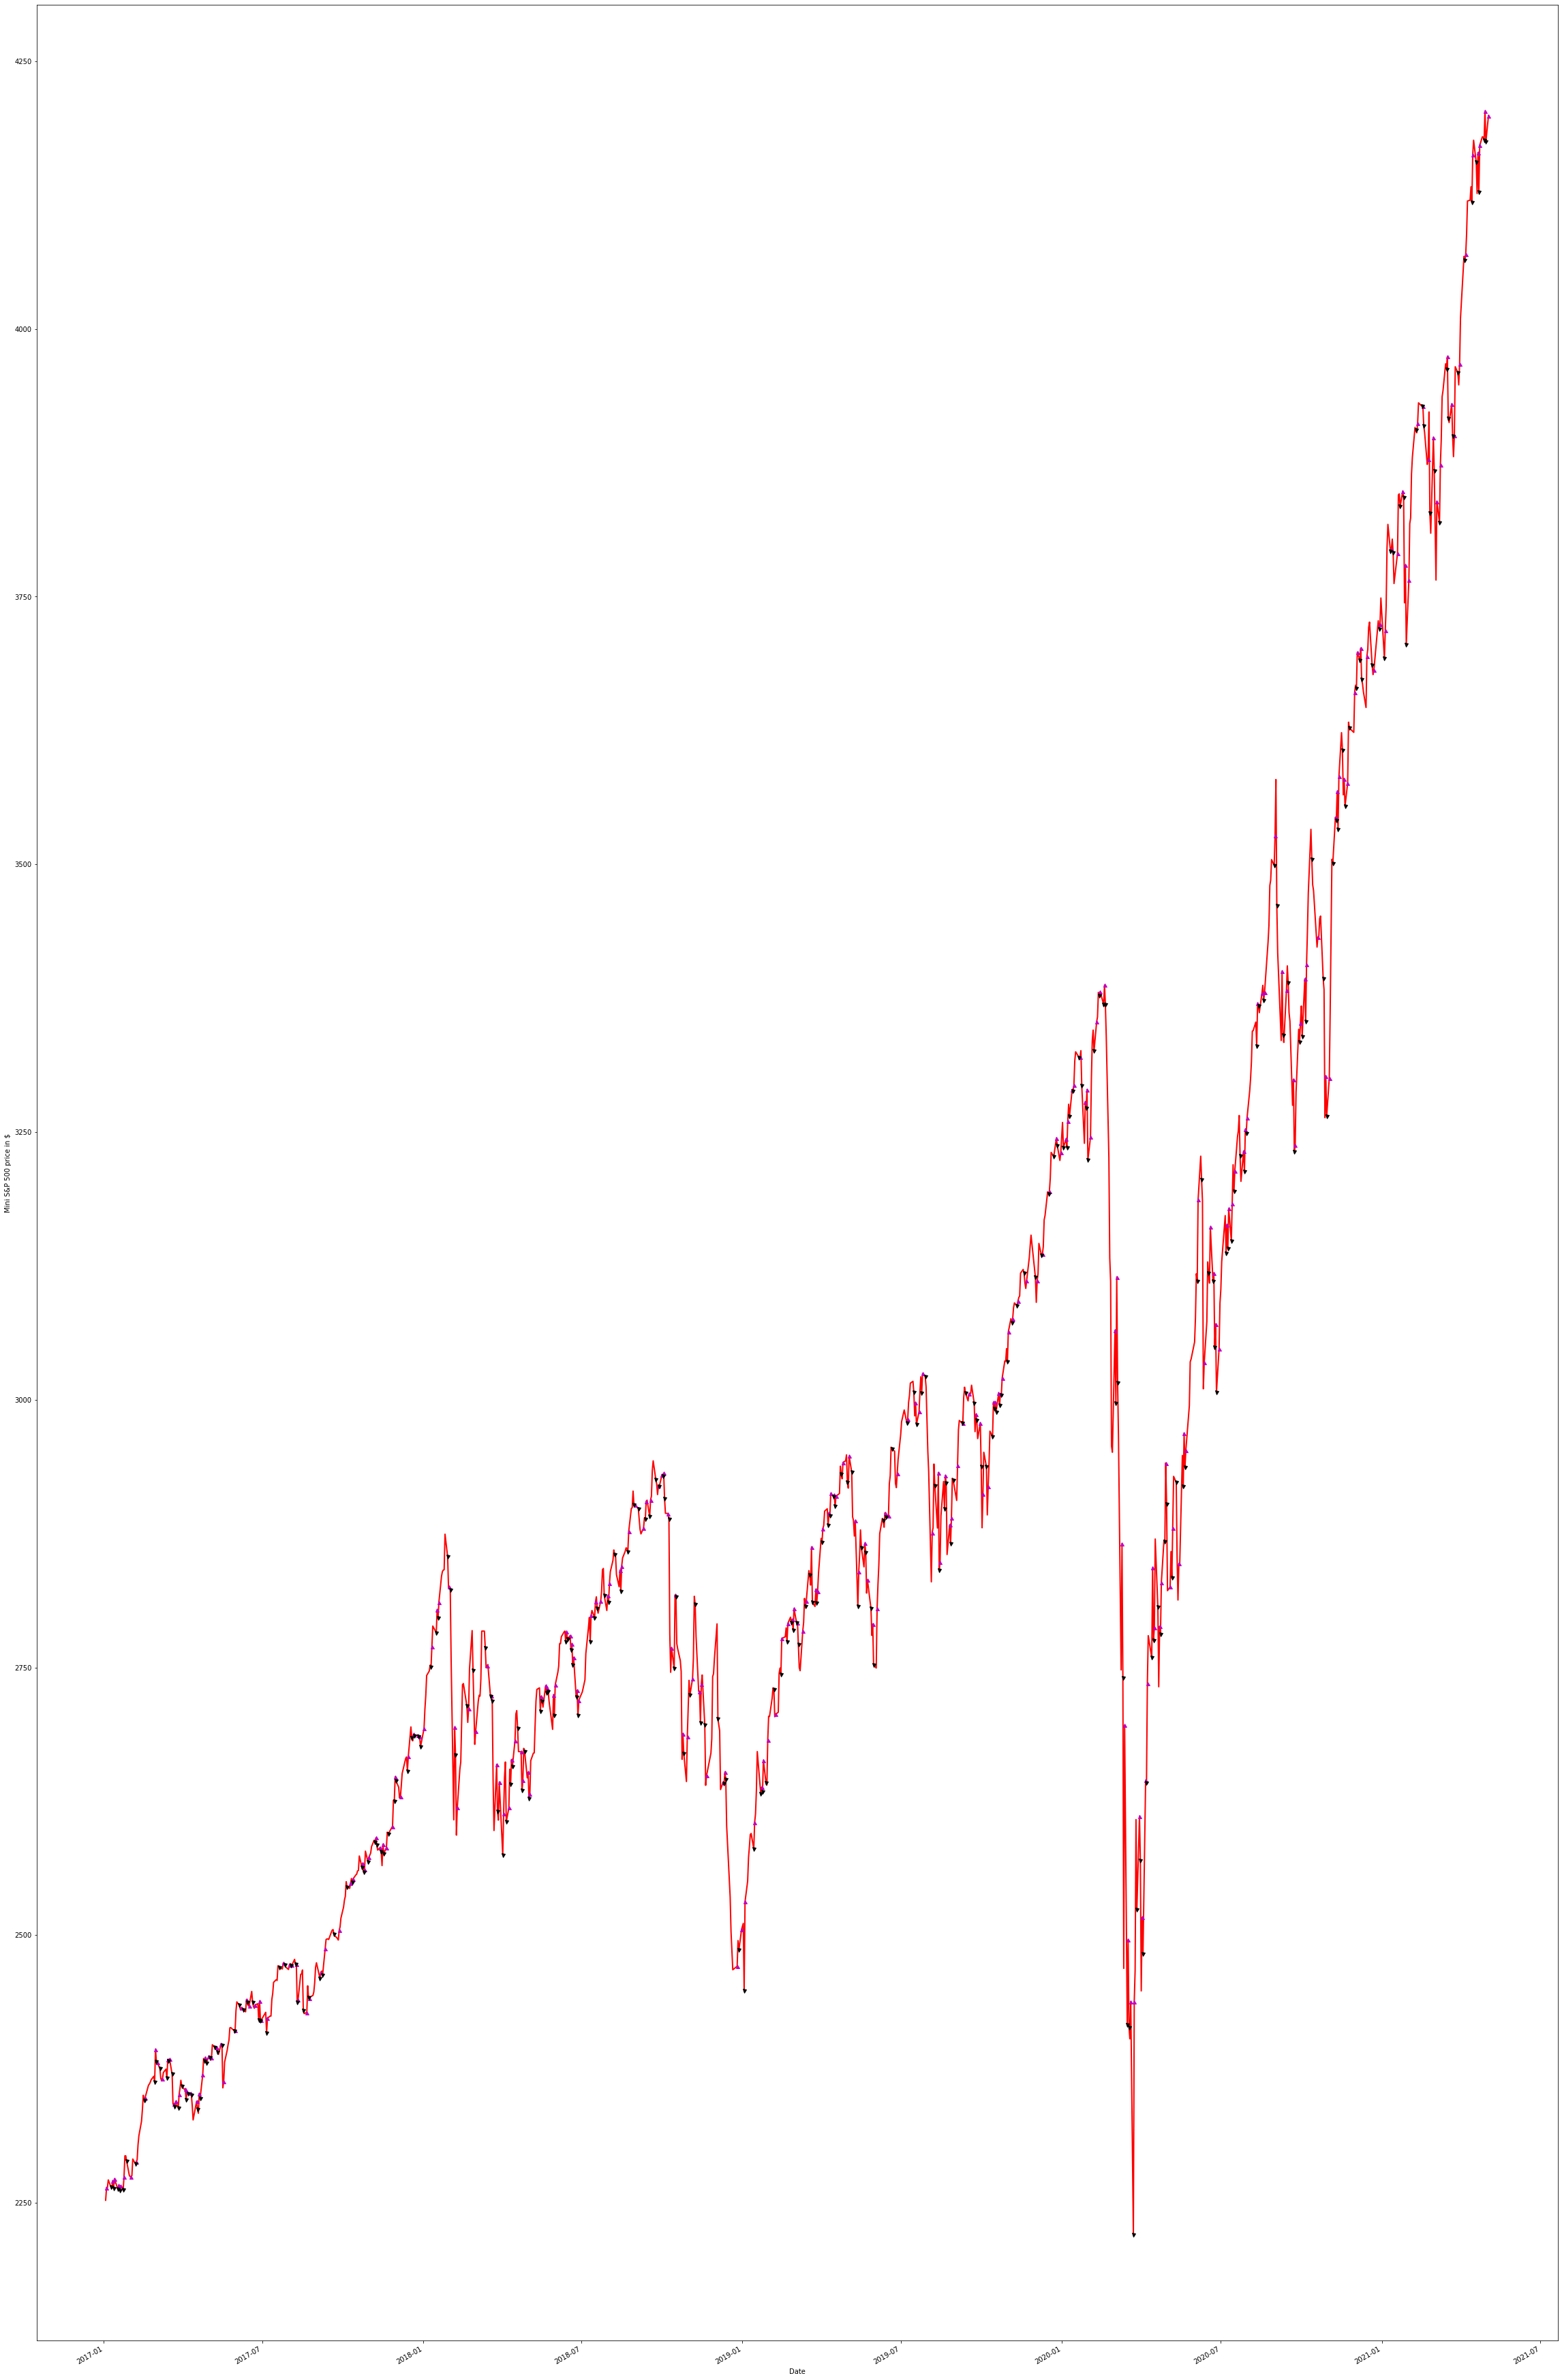

In [66]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40, 70))
ax1 = fig.add_subplot(111, ylabel='Mini S&P 500 price in $')
goog_data_signal['price'].plot(ax=ax1, color='r', lw=2.)
ax1.plot(goog_data_signal.loc[goog_data_signal.positions == 1.0].index,
       goog_data_signal.price[goog_data_signal.positions == 1.0],
       '^', markersize=5, color='m')
ax1.plot(goog_data_signal.loc[goog_data_signal.positions == -1.0].index,
       goog_data_signal.price[goog_data_signal.positions == -1.0],
       'v', markersize=5, color='k')

plt.show()

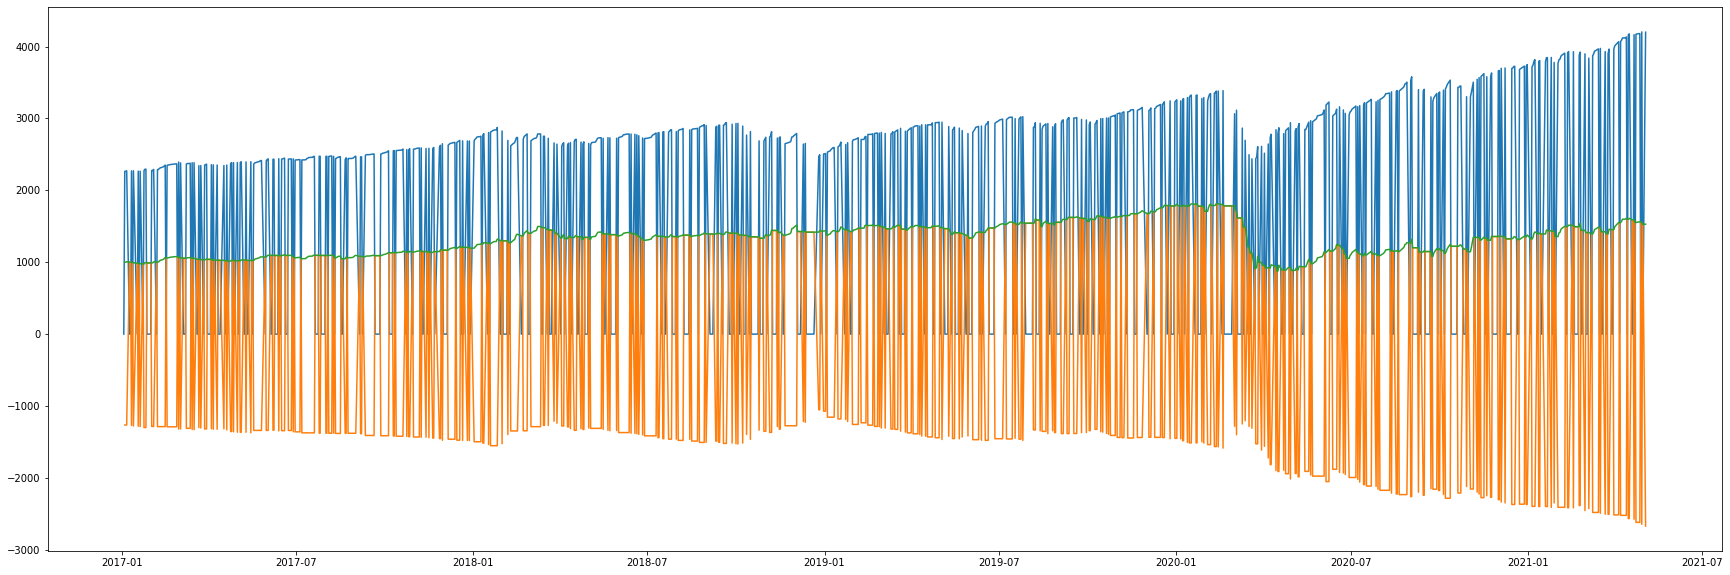

In [67]:
initial_capital = float(1000.0)
positions = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)
portfolio = pd.DataFrame(index=goog_data_signal.index).fillna(0.0)
positions['ES=F'] = goog_data_signal['signal']
portfolio['positions'] = (positions.multiply(goog_data_signal['price'], axis=0))
portfolio['cash'] = initial_capital - (positions.diff().multiply(goog_data_signal['price'], axis=0)).cumsum()
portfolio['total'] = portfolio['positions'] + portfolio['cash']
plt.figure(figsize=(30, 10))
plt.plot(portfolio)
plt.show()